### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from textblob import TextBlob as tb

### Importing the Comments dataset

In [2]:
df=pd.read_csv("Desktop/comments_609026426288720 (2).csv")
df

,Comment Id,Date,Time,form_id,From,Message,Likes,Comments
0,609026476288715_609026876288675,7/23/2019,10:22,6.090000e+14,Bhai bhai,hi,0,0
1,609026476288715_609026892955340,7/23/2019,10:22,6.090000e+14,Bhai bhai,bye,0,1
2,609026476288715_609029069621789,7/23/2019,10:29,2.460000e+15,Harsh Khandelwal,wow very nice post..,0,2
3,609026476288715_609029662955063,7/23/2019,10:30,2.460000e+15,Harsh Khandelwal,very funny,0,0
4,609026476288715_609029732955056,7/23/2019,10:31,6.090000e+14,Bhai bhai,thankyou so much dear,0,0
5,609026476288715_609253272932702,7/23/2019,17:37,6.090000e+14,Bhai bhai,Shut up????,0,0
6,609026476288715_609264796264883,7/23/2019,18:03,6.090000e+14,Bhai bhai,you dumb ass,0,0
7,609026476288715_609264796264889,7/23/2019,18:03,4.090000e+14,Vidit,Very Bad post,0,0
8,609026476288715_609264796264890,7/23/2019,18:04,4.090000e+14,Vidit,वाह तुम कमाल की लग रही हो,0,0
9,609026476288715_609029662955063,7/23/2019,10:30:00,2.460000e+15,Harsh Khandelwal,سيئ جدا,0,0


### Importing the Reactions dataset

In [3]:
df1=pd.read_csv("Desktop/reactions_609026426288720(1).csv")
df1

,form_id,From,Type
0,6.090000e+14,Bhai bhai,LIKE
1,2.460000e+15,Harsh Khandelwal,HAHA
2,4.090000e+14,Vidit,Angry


### Importing the Corpus(Vulgar words)

In [4]:
data=pd.read_csv("Desktop/data.csv")

In [5]:
df["form_id"]  #Column used to merge the comments and the reactions

0    6.090000e+14
1    6.090000e+14
2    2.460000e+15
3    2.460000e+15
4    6.090000e+14
5    6.090000e+14
6    6.090000e+14
7    4.090000e+14
8    4.090000e+14
9    2.460000e+15
Name: form_id, dtype: float64

### Merging the Dataset

In [6]:
merged = df.merge(df1, on='form_id')
del merged["From_y"]
merged.to_csv("output.csv", index=False)
merged

,Comment Id,Date,Time,form_id,From_x,Message,Likes,Comments,Type
0,609026476288715_609026876288675,7/23/2019,10:22,6.090000e+14,Bhai bhai,hi,0,0,LIKE
1,609026476288715_609026892955340,7/23/2019,10:22,6.090000e+14,Bhai bhai,bye,0,1,LIKE
2,609026476288715_609029732955056,7/23/2019,10:31,6.090000e+14,Bhai bhai,thankyou so much dear,0,0,LIKE
3,609026476288715_609253272932702,7/23/2019,17:37,6.090000e+14,Bhai bhai,Shut up????,0,0,LIKE
4,609026476288715_609264796264883,7/23/2019,18:03,6.090000e+14,Bhai bhai,you dumb ass,0,0,LIKE
5,609026476288715_609029069621789,7/23/2019,10:29,2.460000e+15,Harsh Khandelwal,wow very nice post..,0,2,HAHA
6,609026476288715_609029662955063,7/23/2019,10:30,2.460000e+15,Harsh Khandelwal,very funny,0,0,HAHA
7,609026476288715_609029662955063,7/23/2019,10:30:00,2.460000e+15,Harsh Khandelwal,سيئ جدا,0,0,HAHA
8,609026476288715_609264796264889,7/23/2019,18:03,4.090000e+14,Vidit,Very Bad post,0,0,Angry
9,609026476288715_609264796264890,7/23/2019,18:04,4.090000e+14,Vidit,वाह तुम कमाल की लग रही हो,0,0,Angry


### Defining lists for differnet categories of the comments

In [7]:
positive=[]
negative=[]
neutral=[]
facts=[]
abusive=[]
others=[]

### Training the Model

In [8]:
from __future__ import absolute_import
from collections import namedtuple
import nltk
from textblob.en import sentiment as pattern_sentiment
from textblob.tokenizers import word_tokenize
from textblob.decorators import requires_nltk_corpus
from textblob.base import BaseSentimentAnalyzer, DISCRETE, CONTINUOUS
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
nb = Blobber(analyzer=NaiveBayesAnalyzer())


def _default_feature_extractor(words):
    return dict(((word, True) for word in words))

class NaiveBayesAnalyzer(BaseSentimentAnalyzer):
    
    kind = DISCRETE
    #: Return type declaration
    RETURN_TYPE = namedtuple('Sentiment', ['classification', 'p_pos', 'p_neg'])

    def __init__(self, feature_extractor=_default_feature_extractor):
        super(NaiveBayesAnalyzer, self).__init__()
        self._classifier = None
        self.feature_extractor = feature_extractor

    @requires_nltk_corpus
    def train(self):
        """Train the Naive Bayes classifier on the movie review corpus."""
        super(NaiveBayesAnalyzer, self).train()
        neg_ids = nltk.corpus.movie_reviews.fileids('neg')
        pos_ids = nltk.corpus.movie_reviews.fileids('pos')
        neg_feats = [(self.feature_extractor(
            nltk.corpus.movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]
        pos_feats = [(self.feature_extractor(
            nltk.corpus.movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]
        train_data = neg_feats + pos_feats
        self._classifier = nltk.classify.NaiveBayesClassifier.train(train_data)


    def analyze(self, text):
       
        super(NaiveBayesAnalyzer, self).analyze(text)
        tokens = word_tokenize(text, include_punc=False)
        filtered = (t.lower() for t in tokens if len(t) >= 3)
        feats = self.feature_extractor(filtered)
        prob_dist = self._classifier.prob_classify(feats)
        return self.RETURN_TYPE(
            classification=prob_dist.max(),
            p_pos=prob_dist.prob('pos'),
            p_neg=prob_dist.prob("neg")
        )

### Categorizing the comment

In [9]:
comm=merged["Message"] +" "+ merged["Type"]  # Mapping comment with the reaction

reac=merged["Type"]
comm_id=merged["Comment Id"]


# Categorizing the comments
for i in range(len(merged)):
    b=comm[i]
    flag=int(0)
    blob = tb(b)
    p=blob.detect_language()
    print(b)
    print(p)
    
    if(p!='en'):
        b=blob.translate(from_lang=p, to ='en')
        if(b.sentiment.polarity>0.30 and b.sentiment.subjectivity!=1):
            positive.append(comm_id[i])

        elif(b.sentiment.polarity==0 and b.sentiment.subjectivity!=1):
            neutral.append(comm_id[i])

        elif(b.sentiment.polarity<-0.25 and b.sentiment.subjectivity!=1):
            for row in data:
                if(row.lower() in b):
                    abusive.append(b)
                    flag=1;
                    break;
            if(flag==0):
                negative.append(b)            

        elif(b.sentiment.subjectivity>=0.75):
            facts.append(comm_id[i])
        else:
            others.append(comm_id[i])
        
        print(b.sentiment)
    
    else:
        if((nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)>0.0):
            positive.append(comm_id[i])

        elif((nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)<=0.01 and (nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)>=-0.1):
            neutral.append(comm_id[i])

        elif((nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)<-0.25):
            for row in data:
                if(row.lower() in b):
                    abusive.append(b);
                    flag=1;
                    break;
            if(flag==0):
                negative.append(b)            

        elif(((nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)>0.01 and (nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)<0.25) or ((nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)<-0.1 and (nb(b).sentiment.p_pos - nb(b).sentiment.p_neg)>-0.25)):
            facts.append(comm_id[i])
        else:
            others.append(comm_id[i])

        print(nb(b).sentiment)

hi LIKE
en
Sentiment(classification='neg', p_pos=0.483644859813084, p_neg=0.5163551401869159)
bye LIKE
en
Sentiment(classification='neg', p_pos=0.400852052672347, p_neg=0.5991479473276535)
thankyou so much dear LIKE
en
Sentiment(classification='neg', p_pos=0.4201101969350939, p_neg=0.5798898030649061)
Shut up???? LIKE
en
Sentiment(classification='neg', p_pos=0.43258896584666856, p_neg=0.5674110341533315)
you dumb ass LIKE
en
Sentiment(classification='neg', p_pos=0.1515116542353358, p_neg=0.8484883457646647)
wow very nice post.. HAHA
en
Sentiment(classification='neg', p_pos=0.3854309258938403, p_neg=0.6145690741061599)
very funny HAHA
en
Sentiment(classification='pos', p_pos=0.523653936734975, p_neg=0.47634606326502493)
سيئ جدا HAHA
ar
Sentiment(polarity=-0.24999999999999992, subjectivity=0.4833333333333333)
Very Bad post Angry
en
Sentiment(classification='neg', p_pos=0.3460577990790839, p_neg=0.6539422009209162)
वाह तुम कमाल की लग रही हो Angry
hi
Sentiment(polarity=0.35000000000000003,

In [10]:
neutral

['609026476288715_609026876288675']

In [11]:
facts

['609026476288715_609026892955340',
 '609026476288715_609029732955056',
 '609026476288715_609253272932702',
 '609026476288715_609029069621789']

In [12]:
positive

['609026476288715_609029662955063', '609026476288715_609264796264890']

### Calculating the percentage of each category

In [13]:
p_positive = (len(positive)/len(merged))*100
p_negative = (np.unique(negative).size/len(merged))*100
p_neutral  = (len(neutral)/len(merged))*100
p_facts    = (len(facts)/len(merged))*100
p_abusive  = (len(abusive)/len(merged))*100
p_others  = (len(others)/len(merged))*100

In [14]:
#Printing the percentage

print(str(p_positive) + "% people's comment was positive")
print(str(p_negative) + "% people's comment was negative")
print(str(p_neutral) + "% people's comment was neutral")
print(str(p_facts) + "% people's comment was facts")
print(str(p_abusive) + "% people's comment was abusive")
print(str(p_others) + "% people's comment was others(funny,sad...)")

20.0% people's comment was positive
10.0% people's comment was negative
10.0% people's comment was neutral
40.0% people's comment was facts
10.0% people's comment was abusive
10.0% people's comment was others(funny,sad...)


### Plotting the Bar Graph

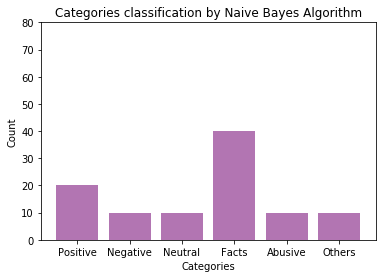

In [15]:
height = [p_positive, p_negative, p_neutral, p_facts,p_abusive,p_others]
bars = ('Positive', 'Negative', 'Neutral', 'Facts', 'Abusive', 'Others')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Categories classification by Naive Bayes Algorithm')
plt.xlabel('Categories')
plt.ylabel('Count')
 
# Limits for the Y axis
plt.ylim(0,80)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
